In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [13]:
import os
print(os.getcwd())

C:\Users\alt


In [14]:
df = pd.read_csv(r'C:\Users\alt\.jupyter\haberman.csv')

In [15]:
df.columns=['Age','Year','Nodes','Survival']

In [16]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# AGENDA : Given a patient with the some age, year of operation and number of lymph node detected, we have to predict or conclude the chances whether the patient will live less then 5 years or more then 5 years.

In [17]:
df.shape

(305, 4)

In [18]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [19]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

In [20]:
#we will not remove the duplicates, as these can be a genuine possubility

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [22]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [23]:
df=df.replace([1,2],[0,1])

In [24]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [25]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


# MIN(AGE)=30, MAX(AGE)=83, YEAR=[1958, 1969], NODES =[0,52], SURVIVAL=[0,1]
# NODES have higher count density between 0 and 4(75% percentile)

# UNIVARIATE ANALYSIS

## 1. Survival

In [27]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [28]:
df.Survival.value_counts(1)

Survival
0    0.734426
1    0.265574
Name: proportion, dtype: float64

In [29]:
# There are only 27% people who will be living less then 5 years, which means the dataset is imbalanced.

<Axes: xlabel='Survival', ylabel='count'>

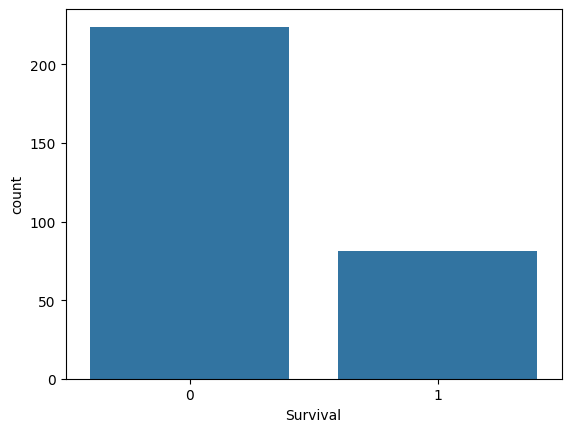

In [30]:
sns.countplot(x='Survival',data=df)

## 2.Age

In [31]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

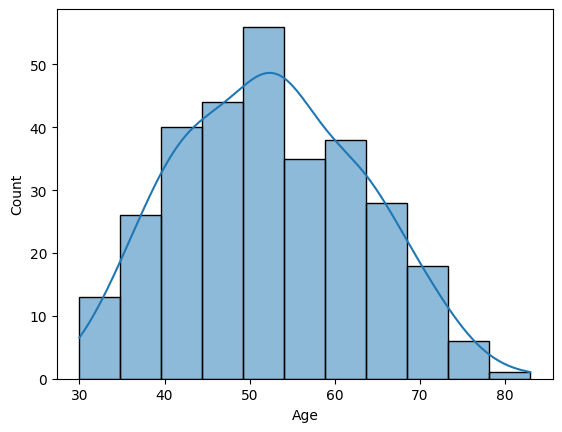

In [32]:
print(df.Age.skew())
sns.histplot(x='Age',data=df, binwidth=5, kde=True)

In [33]:
# The maximum people who were operated where in the age group of 50 to 55

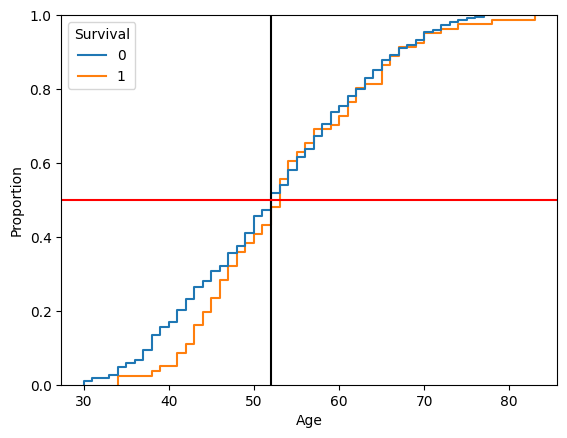

In [34]:
sns.ecdfplot(x='Age', data=df,hue='Survival')
plt.axvline(52, c='black')
plt.axhline(0.5, c='red');

In [35]:
# 80% of the people were 65 years or below.
# 50% of the people were 52 years or below.

# 3.Operation Year

<Axes: xlabel='Year'>

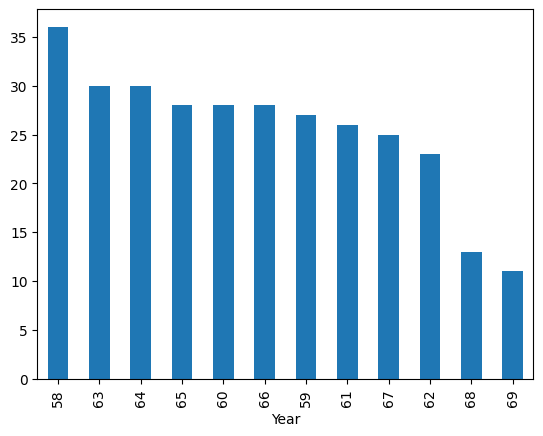

In [36]:
df.Year.value_counts().plot(kind='bar')

## 4.Lymph node

In [37]:
df.Nodes.describe()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

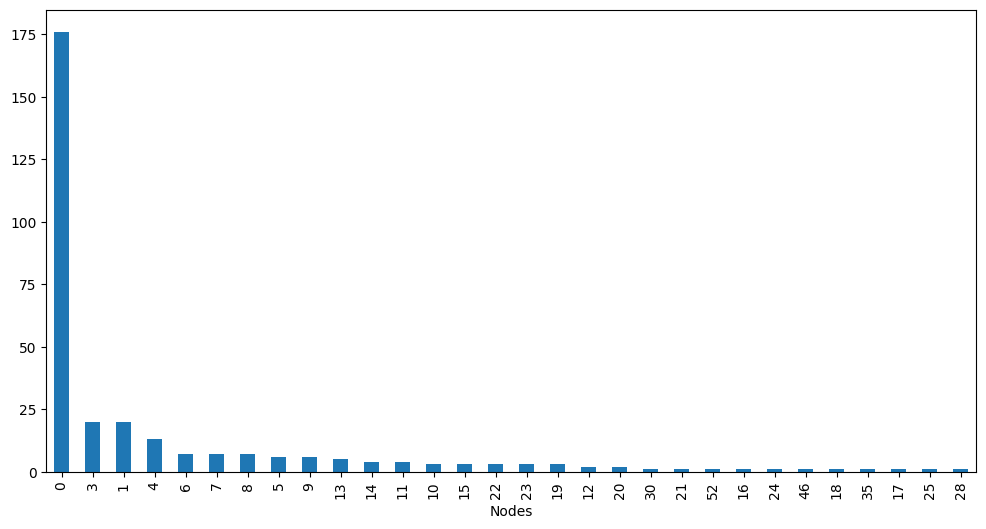

In [38]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar')

2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

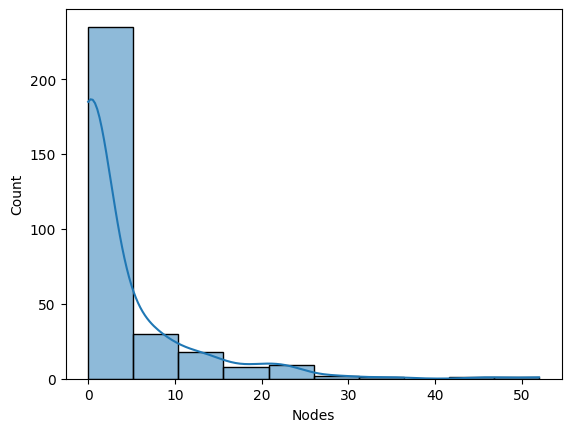

In [39]:
print(df.Nodes.skew())
sns.histplot(x='Nodes',data=df, binwidth=5, kde=True)

# Maximum Density count for nodes is between 0 and 10.


## BIVARIATE ANALYSIS

In [41]:
# Age-Survival
# Age-Nodes-Survival
# Nodes-Survival
# Year-Survival
# Age-Nodes
# Year-Nodes
# Age-Years

<Axes: xlabel='Survival', ylabel='Age'>

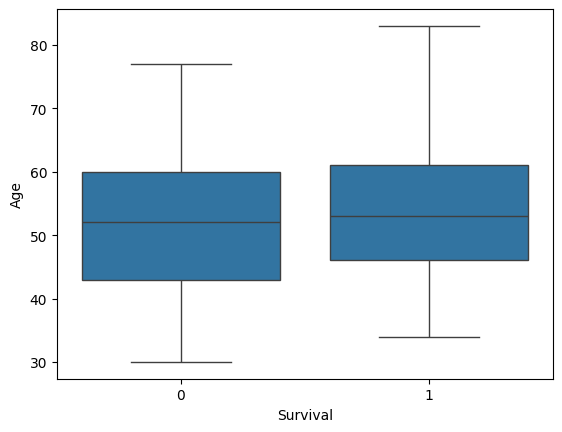

In [42]:
sns.boxplot(x='Survival', y='Age', data=df)

In [ ]:
#People with age>77 will actually live lesser then 5 years
#People with age<35 will actually live more then 5 years

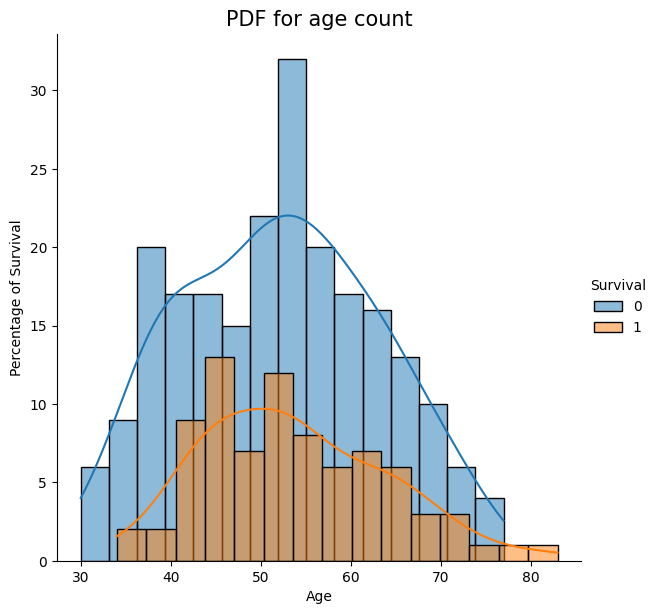

In [52]:
sns.FacetGrid(df, hue='Survival', height =6).map(sns.histplot,'Age', bins=15, kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel('Percentage of Survival')
plt.title('PDF for age count', size=15)
plt.show();

# Maximum % of people living lesser then 5 years are between 43 to 53.
# People between 30-33 years old are living more then 5 years.
# People with age>77 will actually live lesser then 5 years.


In [50]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
43    4
54    4
52    4
46    4
65    4
47    3
41    3
44    3
48    3
57    3
62    3
61    3
45    3
34    2
42    2
55    2
70    2
49    2
50    2
56    2
60    2
67    2
66    2
51    2
39    1
83    1
59    1
63    1
69    1
78    1
74    1
38    1
72    1
40    0
37    0
33    0
35    0
36    0
30    0
31    0
58    0
71    0
64    0
68    0
75    0
73    0
77    0
76    0
Name: Survival, dtype: int64

In [51]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
43    11
57    11
53    11
47    11
41    10
38    10
65    10
55    10
49    10
42     9
45     9
61     9
63     8
59     8
34     7
44     7
46     7
58     7
62     7
56     7
70     7
48     7
60     6
51     6
67     6
39     6
37     6
64     5
66     5
69     4
72     4
40     3
35     2
36     2
30     2
33     2
31     2
68     2
74     2
73     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

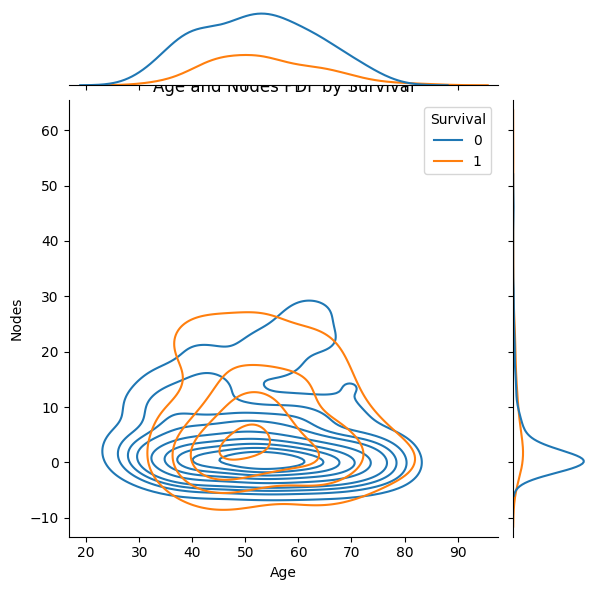

In [74]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Nodes',data=df, hue= 'Survival', kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show;

## AGE[43,53] and NODES[10-52] will live lesser then 5 years.

<Axes: xlabel='Survival', ylabel='Nodes'>

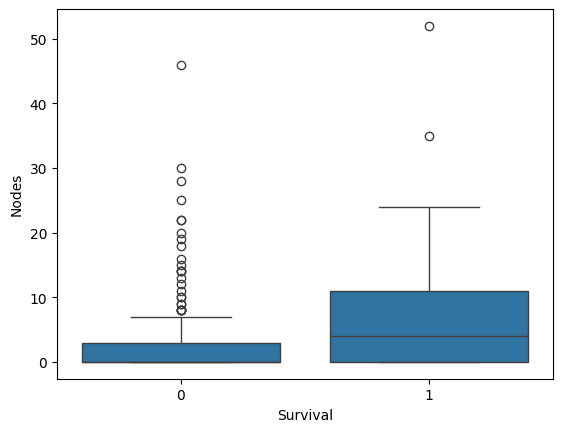

In [57]:
sns.boxplot(x='Survival', y='Nodes', data=df)

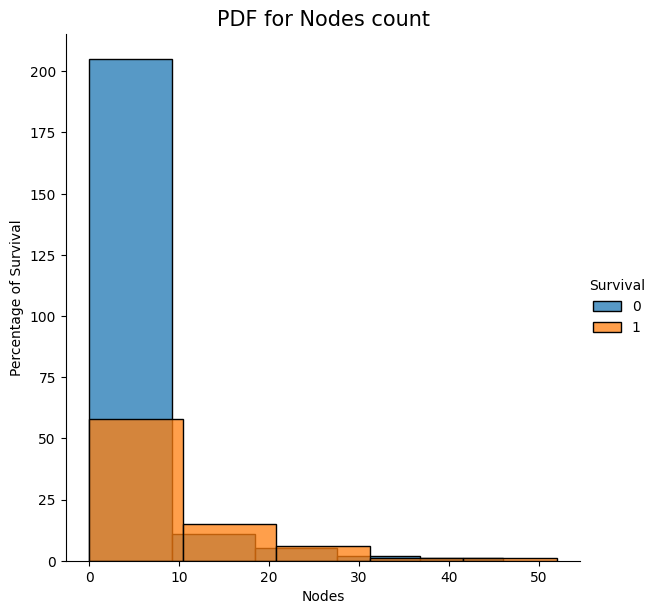

In [58]:
sns.FacetGrid(df, hue='Survival', height =6).map(sns.histplot,'Nodes', bins=5).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Nodes count', size=15)
plt.show();

In [59]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
5      4
13     4
9      4
6      3
4      3
11     3
23     3
8      2
19     2
15     2
7      2
14     1
12     1
10     1
20     1
21     1
22     1
24     1
17     1
52     1
35     1
16     0
18     0
28     0
25     0
30     0
46     0
Name: Survival, dtype: int64

In [60]:
df.Nodes.value_counts().sort_values(ascending=False)

Nodes
0     176
3      20
1      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
22      3
23      3
19      3
12      2
20      2
30      1
21      1
52      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

In [65]:
2/7


0.2857142857142857

In [ ]:
0-15%
1-25%
3-35%
4-23%
5-67%
6-42%
7-29%
8-29%
9-67%
10-33%

13-80%
23-100%

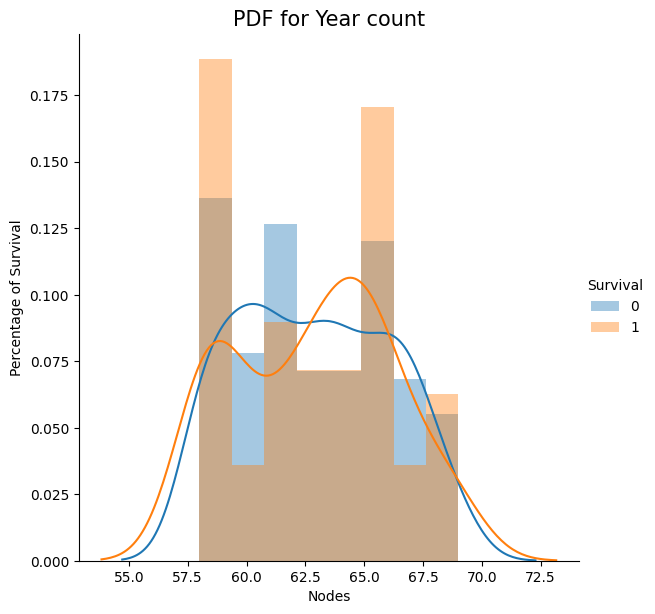

In [72]:
sns.FacetGrid(df, hue='Survival', height =6).map(sns.distplot,'Year', bins=8, kde=True).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year count', size=15)
plt.show();

In [70]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


In [71]:
13/15

0.8666666666666667

# 1965-46%
# 1958-33%
# 1959-45%
# 33% people died before 5 years when operated between 1965,66

<Figure size 1200x600 with 0 Axes>

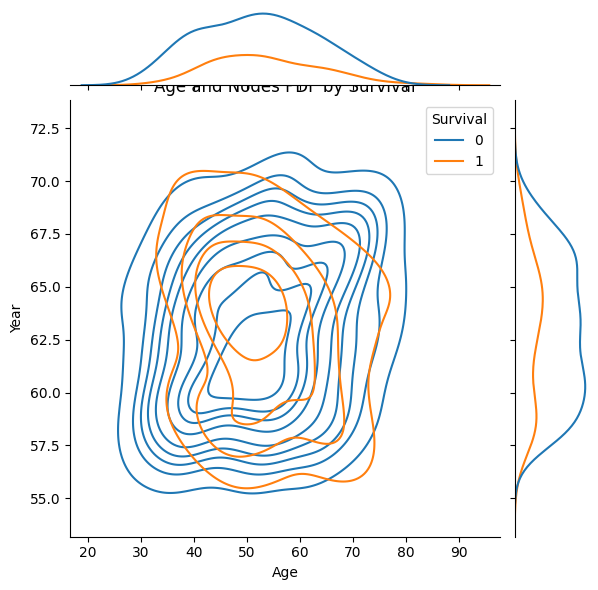

In [75]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Year',data=df, hue= 'Survival', kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show;

# MULTIVARIATE ANALYSIS

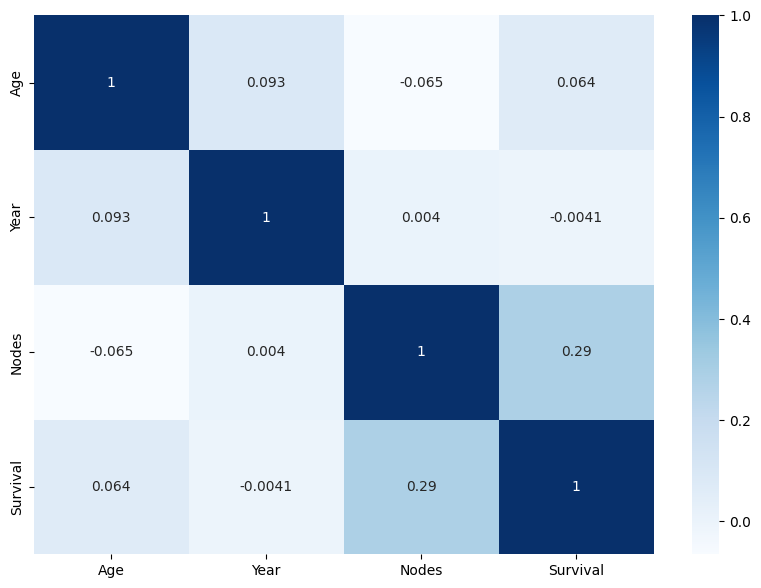

In [80]:
plt.figure(figsize=(10,7))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', annot=True);

# Nodes and Survival are corelated by 29%